Módulo: Machine Learning<br>
Professor: Helder Vieira<br>
Data: 11/2021

# Aula 01 - Árvores - EXERCÍCIO

Utilizando o dataset titanic_train.csv, desenvolva uma árvore de decisão com o objetivo de prever a chance de uma pessoa sobreviver ao naufrágio. Procure fazer com que o seu o modelo não apresente **overfitting** e maximize a acurácia no dataset titanic_test.csv.

Ao final do notebook, reporte:

1 - Uma figura com a árvore treinada  
2 - A acurácia, precisão e recall do seu modelo na base utilizada para treino e validação    
3 - A acurácia, precisão e recall do seu modelo na base titanic_test.csv  
4 - Os parâmetros da árvore  
5 - Qual é a variável mais importante no processo de decisão?  
6 - Imagine que, no seu ambiente de trabalho, bibliotecas não estejam disponíveis. Utilize o resultado do seu modelo **já treinado** para criar um código, utilizando somente os recursos nativos do Python, que seja capaz de prever a sobrevivência de um passageiro.  

### Carregando e visualizando os dados

In [1]:
import pandas as pd

In [2]:
# Carregando arquivos de treino e teste
df_titanic_train = pd.read_csv('titanic_train.csv')
df_titanic_test = pd.read_csv('titanic_test.csv')

In [3]:
# Visualizando shape dos DFs
df_titanic_train.shape,df_titanic_test.shape 

((534, 10), (355, 10))

In [31]:
# Visualizando o DF 
display(df_titanic_train.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,503,0,3,1,29.31947,0,0,7.6292,0,2
1,705,0,3,0,26.00000,1,0,7.8542,0,0
2,464,0,2,0,48.00000,0,0,13.0000,0,0
3,203,0,3,0,34.00000,0,0,6.4958,0,0
4,816,0,1,0,29.31947,0,0,0.0000,1,0


In [6]:
# Informações sobre linhas, colunas e tipos de dados
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  534 non-null    int64  
 1   Survived     534 non-null    int64  
 2   Pclass       534 non-null    int64  
 3   Sex          534 non-null    int64  
 4   Age          534 non-null    float64
 5   SibSp        534 non-null    int64  
 6   Parch        534 non-null    int64  
 7   Fare         534 non-null    float64
 8   Cabin        534 non-null    int64  
 9   Embarked     534 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 41.8 KB


In [7]:
# Estatísticas descritivas
df_titanic_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,534.0,442.202247,253.189116,2.00,220.2500,438.50000,661.5,891.0
Survived,534.0,0.380150,0.485879,0.00,0.0000,0.00000,1.0,1.0
Pclass,534.0,2.342697,0.828985,1.00,2.0000,3.00000,3.0,3.0
Sex,534.0,0.338951,0.473797,0.00,0.0000,0.00000,1.0,1.0
Age,534.0,29.303214,12.742699,0.75,22.0000,29.31947,34.0,71.0
SibSp,534.0,0.529963,1.154988,0.00,0.0000,0.00000,1.0,8.0
Parch,534.0,0.372659,0.799673,0.00,0.0000,0.00000,0.0,5.0
Fare,534.0,29.707731,40.457129,0.00,7.8958,14.45420,29.7,263.0
Cabin,534.0,0.219101,0.414025,0.00,0.0000,0.00000,0.0,1.0
Embarked,534.0,0.380150,0.653795,0.00,0.0000,0.00000,1.0,2.0


### Modelo usando árvores de classificação (classification trees)

In [9]:
# Definindo variáveis X and y
X = df_titanic_train.drop(['PassengerId','Survived'], axis=1)
y = df_titanic_train['Survived']

In [10]:
# Definindo subconjuntos de treino e validação
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(373, 8) (373,)
(161, 8) (161,)


#### Verificando as proporções da variável target nos conjuntos de treino e validação

In [11]:
y_train.value_counts(normalize=True)

0    0.616622
1    0.383378
Name: Survived, dtype: float64

In [12]:
y_valid.value_counts(normalize=True)

0    0.627329
1    0.372671
Name: Survived, dtype: float64

**Modelo 1:** Fazendo um modelo sem restrições para observar o overfitting 

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model_1 = DecisionTreeClassifier()
model_1

DecisionTreeClassifier()

In [15]:
# Fitting the data
model_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# Testing the model with the training and validation sets
y_train_pred = model_1.predict(X_train)
y_valid_pred = model_1.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(373,) (161,)


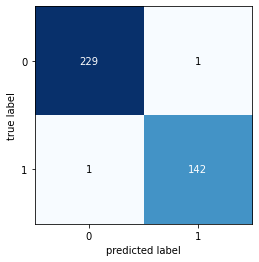

In [17]:
# Plotting the confusion matrix for the training set
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_train, y_train_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

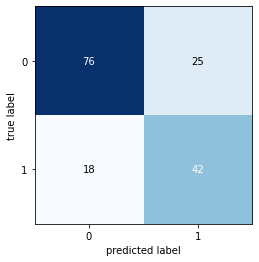

In [18]:
# Plotting the confusion matrix for the validation test
cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

#### Comparando as métricas de treino e validação

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Train:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validation:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Train:
Acc: 0.99, Precision: 0.99, Recall: 0.99
Validation:
Acc: 0.73, Precision: 0.63, Recall: 0.70


**Obs.:** Podemos notar que o modelo está ajustado aos dados de treinamento e generaliza mal para os dados de validação, caracterizando o overfitting do modelo.

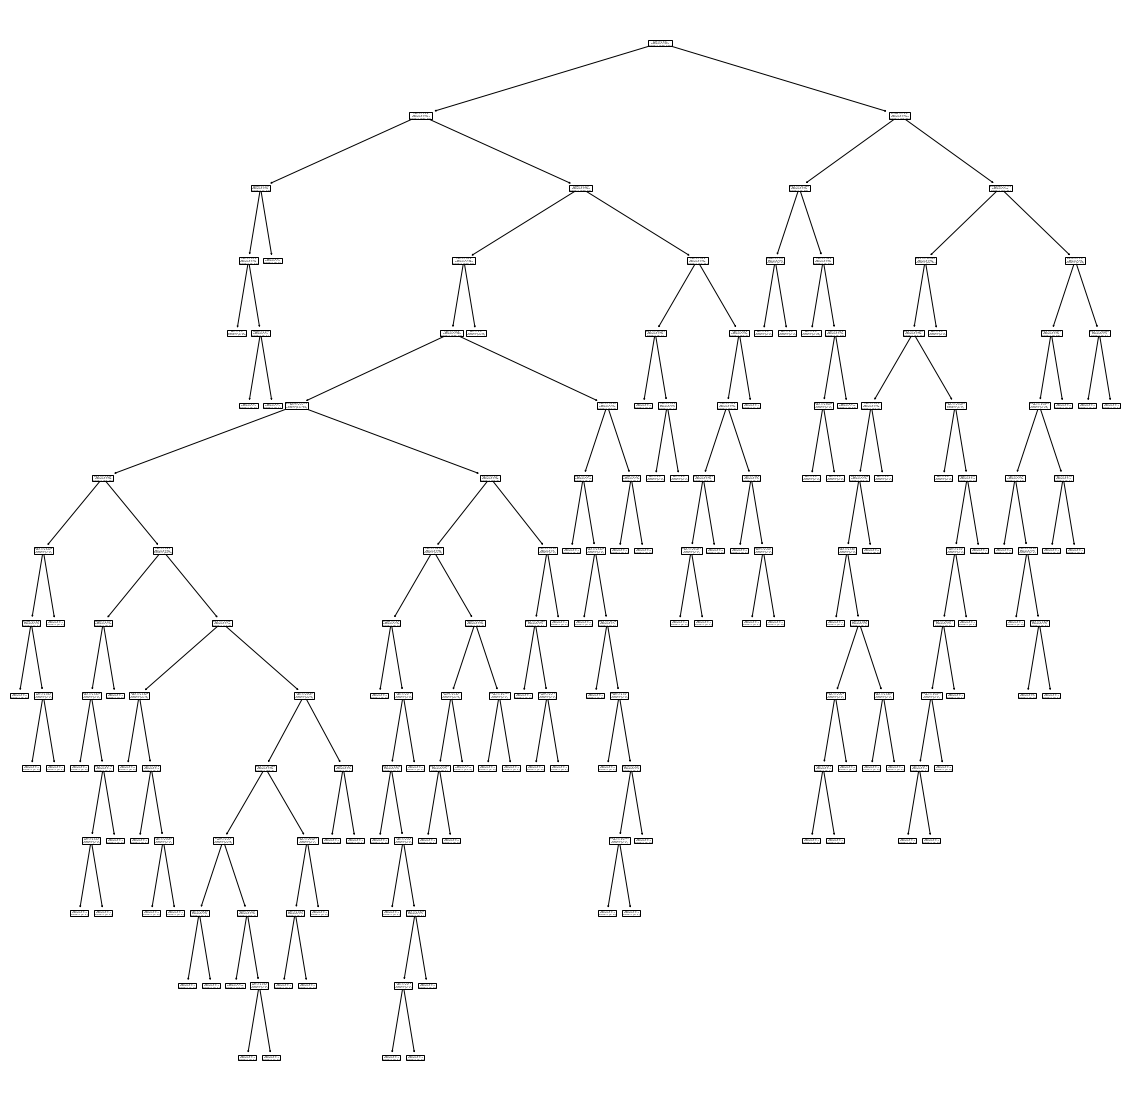

In [20]:
# Visualizção da árvore
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(model_1, feature_names=X_train.columns)
plt.show()

**Modelo 2:** Configurando restrições de profundidade da árvore para reduzir o overfitting

In [22]:
# Criando e treinando o modelo
model_2 = DecisionTreeClassifier(max_depth=2)
model_2.fit(X_train, y_train)

# Gerando os preditos de treino e validação
y_train_pred = model_2.predict(X_train)
y_valid_pred = model_2.predict(X_valid)

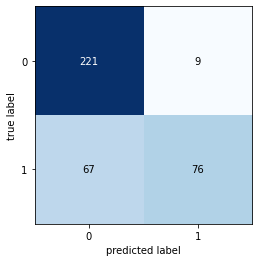

In [23]:
# Matriz de confusão: dados de treino
cm = confusion_matrix(y_train, y_train_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

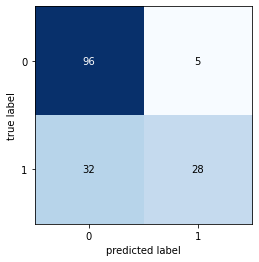

In [21]:
# Matriz de confusão: dados de validação
cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [24]:
# Comparando métricas de treino e validação
acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Train:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validation:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Train:
Acc: 0.80, Precision: 0.89, Recall: 0.53
Validation:
Acc: 0.77, Precision: 0.85, Recall: 0.47


**Obs.:** Ainda temos uma diferença de 3% entre treino e validação, indicando ainda um leve overfitting. 

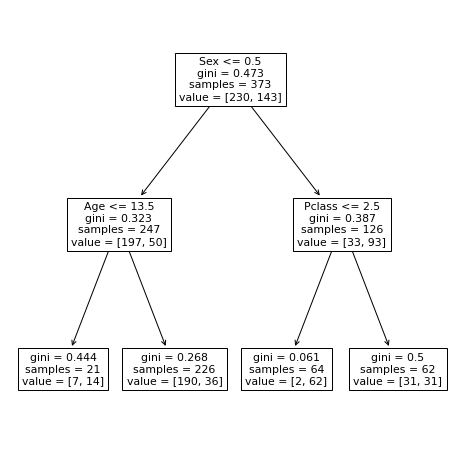

In [25]:
# Visualizando a árvore
plt.figure(figsize=(8, 8))
plot_tree(model_2, feature_names=X_train.columns)
plt.show()

**Modelo 3:** Configurando restrições de profundidade e de folhas em busca de reduzir o overfitting 

In [26]:
# Criando e treinando o modelo
model_3 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)
model_3.fit(X_train, y_train)

# Gerando os preditos de treino e validação
y_train_pred = model_3.predict(X_train)
y_valid_pred = model_3.predict(X_valid)

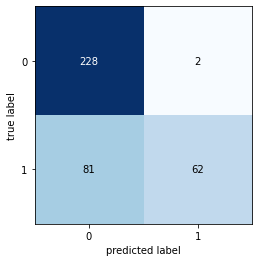

In [27]:
# Matriz de confusão: treino
cm = confusion_matrix(y_train, y_train_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

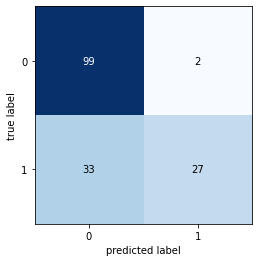

In [28]:
# Matriz de confusão: validação
cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [29]:
# Comparando métricas de treino e validação
acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Train:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validation:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Train:
Acc: 0.78, Precision: 0.97, Recall: 0.43
Validation:
Acc: 0.78, Precision: 0.93, Recall: 0.45


**Obs.:** Agora temos um modelo com acurácia semelhante para os conjuntos de treino e validação, indicando boa generalização e sem overfitting.

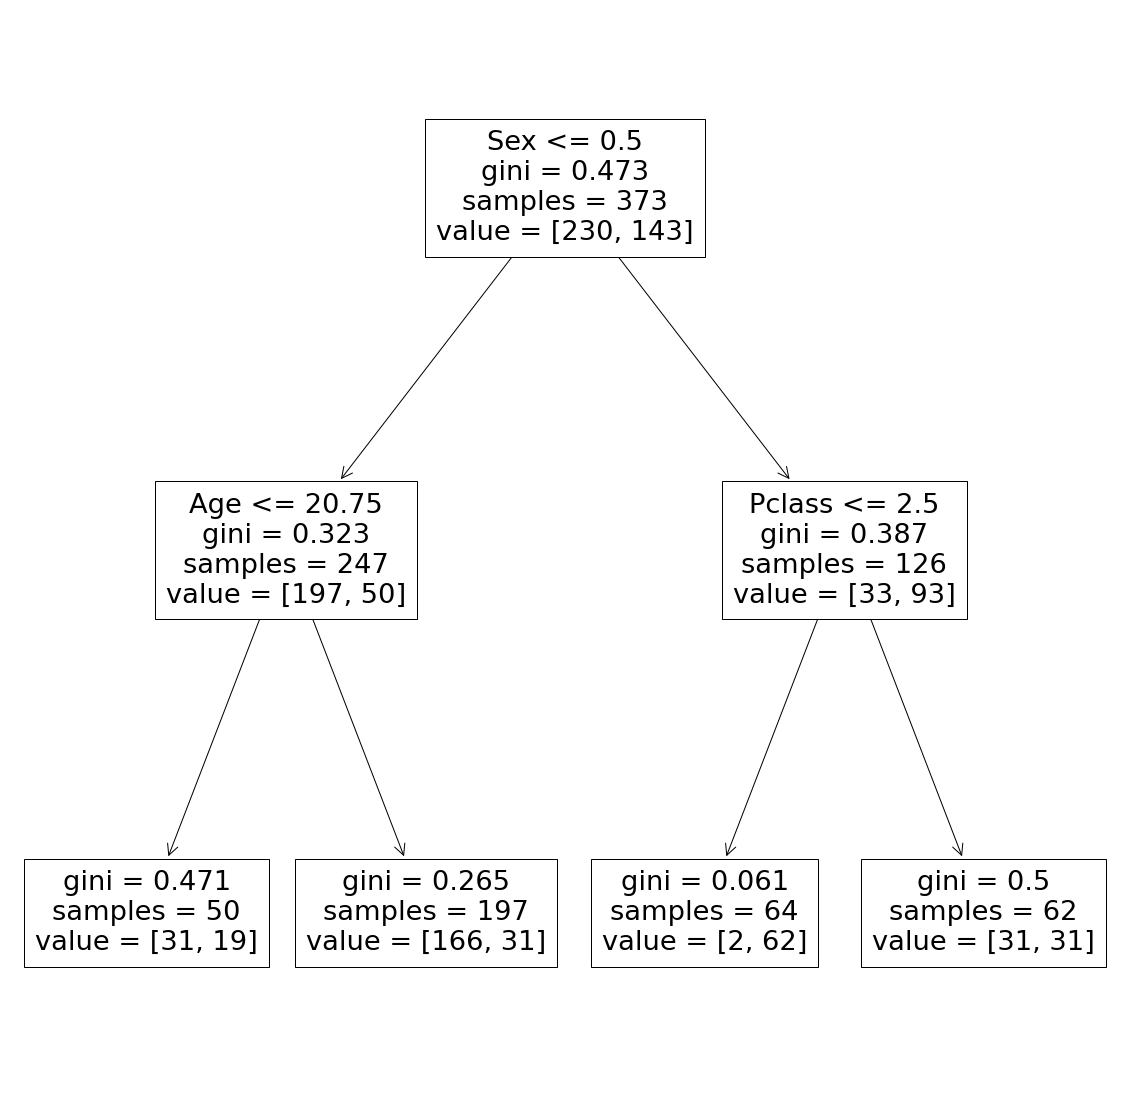

In [30]:
# Visualizando a árvore
plt.figure(figsize=(20, 20))
plot_tree(model_3, feature_names=X_train.columns)
plt.show()

### Teste do modelo

Após treino e validação do modelo, utilizamos o modelo para processar um conjunto de dados de teste. 

In [32]:
# Visualizando o DF de teste
display(df_titanic_test.head())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,3,1,3,1,26.0,0,0,7.9250,0,0
2,4,1,1,1,35.0,1,0,53.1000,1,0
3,5,0,3,0,35.0,0,0,8.0500,0,0
4,7,0,1,0,54.0,0,0,51.8625,1,0


In [33]:
# Resumo das informações do DF
df_titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  355 non-null    int64  
 1   Survived     355 non-null    int64  
 2   Pclass       355 non-null    int64  
 3   Sex          355 non-null    int64  
 4   Age          355 non-null    float64
 5   SibSp        355 non-null    int64  
 6   Parch        355 non-null    int64  
 7   Fare         355 non-null    float64
 8   Cabin        355 non-null    int64  
 9   Embarked     355 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 27.9 KB


In [34]:
# Estatísticas descritivas
df_titanic_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,355.0,451.712676,262.880452,1.00,228.000,460.000000,681.5000,889.0000
Survived,355.0,0.385915,0.487498,0.00,0.000,0.000000,1.0000,1.0000
Pclass,355.0,2.264789,0.842229,1.00,1.000,3.000000,3.0000,3.0000
Sex,355.0,0.369014,0.483219,0.00,0.000,0.000000,1.0000,1.0000
Age,355.0,30.136549,13.306392,0.42,22.000,30.226054,36.0000,80.0000
SibSp,355.0,0.515493,1.023267,0.00,0.000,0.000000,1.0000,8.0000
Parch,355.0,0.397183,0.818220,0.00,0.000,0.000000,1.0000,6.0000
Fare,355.0,35.690200,60.906162,0.00,7.925,14.454200,33.6875,512.3292
Cabin,355.0,0.239437,0.427342,0.00,0.000,0.000000,0.0000,1.0000
Embarked,355.0,0.335211,0.608578,0.00,0.000,0.000000,1.0000,2.0000


In [35]:
# Verificando a proporção do target
df_titanic_test['Survived'].value_counts(normalize=True)

0    0.614085
1    0.385915
Name: Survived, dtype: float64

In [36]:
# Separando as features e a target
X_test = df_titanic_test.drop(['PassengerId','Survived'], axis=1)
y_test = df_titanic_test['Survived']

In [37]:
# Usando o modelo 3 para gerar os preditos a partir dos dados de teste
y_test_pred = model_3.predict(X_test)

Matriz de confusão para o conjunto de teste


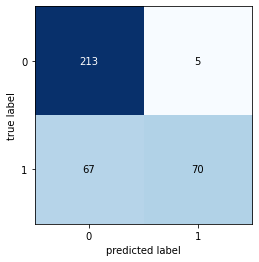

In [38]:
# Matriz de confusão: teste
cm = confusion_matrix(y_test, y_test_pred)
print('Matriz de confusão para o conjunto de teste')
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [39]:
# Métricas do teste

acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)

print('Sumário dos resultados do modelo 3:\n')
print(f'Train:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validation:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')
print(f'Test:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Sumário dos resultados do modelo 3:

Train:
Acc: 0.78, Precision: 0.97, Recall: 0.43
Validation:
Acc: 0.78, Precision: 0.93, Recall: 0.45
Test:
Acc: 0.78, Precision: 0.93, Recall: 0.45


**Obs.:** Note que o desempenho no teste foi similar ao de validação, indicando que temos um modelo adequado que generaliza para outros dados. 

### Retomando o exercício

Ao final do notebook, reporte:

1 - Uma figura com a árvore treinada  
2 - A acurácia, precisão e recall do seu modelo na base utilizada para treino e validação    
3 - A acurácia, precisão e recall do seu modelo na base titanic_test.csv  
4 - Os parâmetros da árvore  
5 - Qual é a variável mais importante no processo de decisão?  
6 - Imagine que, no seu ambiente de trabalho, bibliotecas não estejam disponíveis. Utilize o resultado do seu modelo **já treinado** para criar um código, utilizando somente os recursos nativos do Python, que seja capaz de prever a sobrevivência de um passageiro.  

1 - Árvore treinada

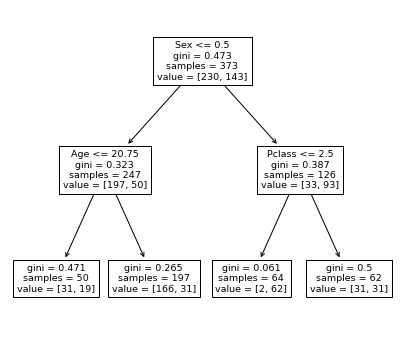

In [40]:
plt.figure(figsize=(7, 6))
plot_tree(model_3, feature_names=X_train.columns)
plt.show()

2 - A acurácia, precisão e recall do modelo na base utilizada para treino e validação

In [41]:
print(f'Train:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validation:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Train:
Acc: 0.78, Precision: 0.97, Recall: 0.43
Validation:
Acc: 0.78, Precision: 0.93, Recall: 0.45


3 - A acurácia, precisão e recall do modelo na base de teste

In [42]:
print(f'Test:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Test:
Acc: 0.78, Precision: 0.93, Recall: 0.45


4 - Parâmetros da árvore

In [43]:
model_3.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

5 - Qual é a variável mais importante identificada pelo modelo? É a variável 'Sex'. 

6 - Escrevendo uma função em Python que implemente o modelo 3. 

In [44]:
def titanic_survived(passanger):
    
    if passanger['Sex'] <= 0.5:
        return 0
    else:
        if passanger['Pclass'] <= 2.5:
            return 1
        else:
            return 0

In [46]:
# Gerando predições utilizando a função
individual_1 = {
    'Pclass': 1,'Sex': 1, 'Age': 90.0, 'SibSp': 1, 'Parch': 0,
    'Fare': 7.25,'Cabin': 0, 'Embarked': 0
}

titanic_survived(individual_1)

1

In [47]:
# Gerando predições utilizando a função
individual_2 = {
    'Pclass': 1,'Sex': 0, 'Age': 90.0, 'SibSp': 1, 'Parch': 0,
    'Fare': 7.25,'Cabin': 0, 'Embarked': 0
}

titanic_survived(individual_2)

0

In [49]:
# Gerando predições utilizando a função
individual_3 = {
    'Pclass': 3,'Sex': 0, 'Age': 90.0, 'SibSp': 1, 'Parch': 0,
    'Fare': 7.25,'Cabin': 0, 'Embarked': 0
}

titanic_survived(individual_3)

0